### Importing Required libraries

In [32]:
import pandas as pd
import numpy as np

### Rating

In [16]:
df_rating = pd.read_csv(r"C:\Users\LENOVO\Downloads\movie_data (1)\ratings.csv")

In [17]:
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### What is the shape of "ratings.csv"?


In [18]:
df_rating.shape

(100836, 4)

### How many unique "userId" are available in "ratings.csv"?

In [19]:
len(df_rating["userId"].unique())

610

### What is the shape of "movies.csv"?

In [23]:
df1_mov = pd.read_csv(r"C:\Users\LENOVO\Downloads\movie_data (1)\movies.csv")

In [24]:
df1_mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
df1_mov.shape

(9742, 3)

### Tags

In [30]:
df_tag = pd.read_csv(r"C:\Users\LENOVO\Downloads\movie_data (1)\tags.csv")

In [31]:
df_tag

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### Link

In [50]:
df_link = pd.read_csv(r"C:\Users\LENOVO\Downloads\movie_data (1)\links.csv")

In [51]:
df_link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


### Which movie has recieved maximum number of user ratings?

In [28]:
bg = df_rating.groupby('movieId')['rating'].count().sort_values(ascending = False)[:436]

In [29]:
df_rating.merge(bg, on = 'movieId', how = 'inner').merge(df1_mov, on = 'movieId', how = 'inner').groupby('title')['rating_x'].count().sort_values(ascending = False)

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Bad Boys (1995)                      51
Army of Darkness (1993)              51
The Devil's Advocate (1997)          51
Mulholland Drive (2001)              51
Training Day (2001)                  51
Name: rating_x, Length: 436, dtype: int64

### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [ ]:
Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

alternate universe
karate
philosophy
post apocalypti

### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [33]:
a1 = df_rating.merge(df1_mov, on = 'movieId', how = 'inner').merge(df_tag, on ='userId', how = 'inner' )

In [34]:
a1[a1['title'] == "Matrix, The (1999)"]['tag'].unique()

array(['Al Pacino', 'gangster', 'mafia', ..., 'ocean', 'Stock Market',
       'Everything you want is here'], dtype=object)

In [35]:
a1[a1['title'] == "Terminator 2: Judgment Day (1991)"]['rating'].mean()

3.967585403726708

### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: ylabel='Density'>

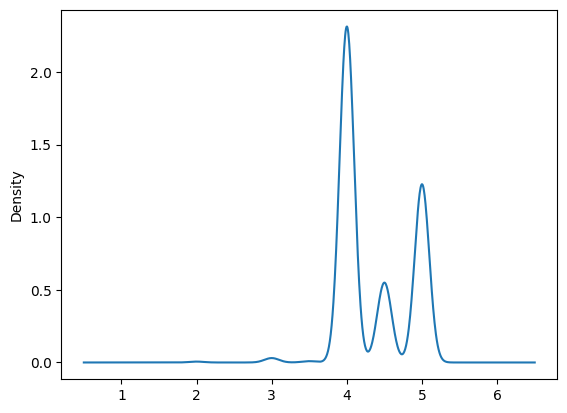

In [36]:
a1[a1['title'] == 'Fight Club (1999)']['rating'].plot(kind = 'kde')

### Which movie is the most popular based on  average user ratings?

* Godfather, The (1972)
* Shawshank Redemption, The (1994)
* Jumanji (1995)
* Wolf of Wall Street, The (2013)

In [38]:
a2 = a1.merge(bg, left_on = 'movieId_x', right_on = 'movieId' ,how = 'inner')

In [39]:
a2.groupby('title')['rating_x'].mean().sort_values(ascending = False).head(20)

title
Dead Man Walking (1995)                                 4.924433
Sound of Music, The (1965)                              4.901365
Grand Budapest Hotel, The (2014)                        4.861318
Magnolia (1999)                                         4.848837
Casablanca (1942)                                       4.804904
Harry Potter and the Prisoner of Azkaban (2004)         4.767660
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    4.756492
Sense and Sensibility (1995)                            4.722105
L.A. Confidential (1997)                                4.720321
Graduate, The (1967)                                    4.686774
Fugitive, The (1993)                                    4.673455
Harry Potter and the Goblet of Fire (2005)              4.665650
Schindler's List (1993)                                 4.654129
Godfather, The (1972)                                   4.638858
When Harry Met Sally... (1989)                          4.636268
Star Trek: First Co

In [40]:
grouped_df = df_rating.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()


In [41]:
merged_df = pd.merge(df1_mov, grouped_df, on='movieId', how='inner')

In [42]:
filtered_df = merged_df[merged_df['rating_count'] > 50]


In [43]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

* Pulp Fiction (1994)
* Bad Boys (1995)
* Silence of the Lambs, The (1991)
* Matrix, The (1999)

In [44]:
top_5_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)


print(top_5_movies[['movieId', 'title', 'rating_count']])


      movieId                             title  rating_count
314       356               Forrest Gump (1994)           329
277       318  Shawshank Redemption, The (1994)           317
257       296               Pulp Fiction (1994)           307
510       593  Silence of the Lambs, The (1991)           279
1938     2571                Matrix, The (1999)           278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [46]:

sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)


third_most_popular_sci_fi_movie = sci_fi_movies_sorted.iloc[2]

In [47]:
print(third_most_popular_sci_fi_movie[['movieId', 'title', 'rating_count']])


movieId                          480
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [61]:
sci_fi_movies 

,movieId,title,genres,rating_count,rating_mean
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


### Mention the movieId of the movie which has the highest IMDB rating.

In [55]:
df_link.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [54]:

top_imdb_movie = df_link.sort_values(by='imdbId', ascending=False).iloc[0]


highest_imdb_movieId = top_imdb_movie['movieId']


print("The movieId with the highest IMDb rating is:", highest_imdb_movieId)


The movieId with the highest IMDb rating is: 193587.0


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [63]:
im = df1_mov.merge(df_link, on = 'movieId', how = 'inner')

In [65]:
im

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


In [66]:

sci_fi_movies = im[im['genres'].str.contains('Sci-Fi')]


top_sci_fi_movie = sci_fi_movies.sort_values(by='imdbId', ascending=False).iloc[0]


highest_imdb_sci_fi_movieId = top_sci_fi_movie['movieId']


print("The movieId of the highest-rated Sci-Fi movie is:", highest_imdb_sci_fi_movieId)


The movieId of the highest-rated Sci-Fi movie is: 179053
